# One-dimensional Statistical Descriptive Analysis - Classroom Grades
 
Four datasets ("grades_classroom01.txt", "grades_classroom02.txt", "grades_classroom03.txt" and "grades_classroom04.txt") have the final grades for four classrooms in a course with four hundred students. Using simple descriptive statistics, we can compare the performance of the four classrooms. Consider that a student must have a grade greater or equal to 50 to be approved.

As an initial measure of performance, we take the averages of all grades:

In [13]:
import numpy as np

classrooms = []
classrooms.append(np.loadtxt("../data/raw/grades_classroom01.txt"))
classrooms.append(np.loadtxt("../data/raw/grades_classroom02.txt"))
classrooms.append(np.loadtxt("../data/raw/grades_classroom03.txt"))
classrooms.append(np.loadtxt("../data/raw/grades_classroom04.txt"))

# print average grade for each classroom
for count, cl in enumerate(classrooms):
    print("--- Classroom: %d ---" % (count + 1))
    print("Average grade: %f" % np.mean(cl))    

--- Classroom: 1 ---
Average grade: 60.184600
--- Classroom: 2 ---
Average grade: 55.184400
--- Classroom: 3 ---
Average grade: 39.984800
--- Classroom: 4 ---
Average grade: 45.090900


By looking at the average grades, one may conclude that Classroom 1 has the best performance of all. However, the mean may be misleading sometimes as the data can be skewed or have different kurtosis. To visually verify if our data is impacted by any of these two, we can plot histograms and boxplots.

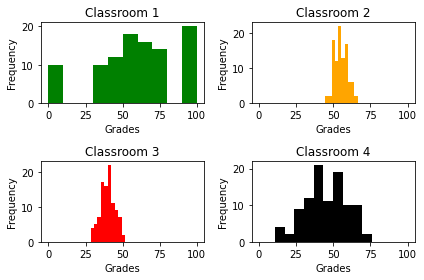

Text(0.5, 1.0, 'All Classrooms Combined')

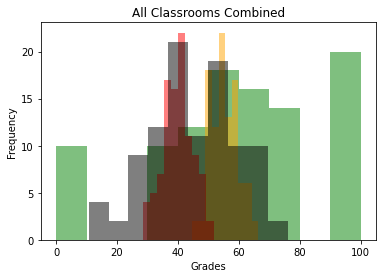

In [52]:
import matplotlib.pyplot as plt

# set different colors and titles for our histograms
colors = ['g', 'orange', 'r', 'k']
titles = ['Classroom 1', 'Classroom 2', 'Classroom 3', 'Classroom 4']

# create a figure with 4 subplots, each one having one histogram
f, a = plt.subplots(2, 2)
a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(classrooms[idx], color=colors[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel("Grades")
    ax.set_ylabel("Frequency")
    ax.set_xlim(-5, 105)
plt.tight_layout()
plt.show()

# plot all histograms overlayed. We will let hist function define the histogram bins
# because if we fix specific bins, the bars from the histogram will accumulate across
# different classrooms
plt.hist(classrooms[0], alpha = 0.5, color='g')
plt.hist(classrooms[1], alpha = 0.5, color='orange')
plt.hist(classrooms[2], alpha = 0.5, color='r')
plt.hist(classrooms[3], alpha = 0.5, color='k')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("All Classrooms Combined")

Observing the histograms for each class, it is possible to see that Classroom 1 has the highest mean not because it actually has the best common student performance, but because of many students that have grades above 90. Note that lots of students also have a very low grade in Classroom 1: 10 of them have grades below 10.

Classrooms 2 and 3 have a very high kurtosis, which can be seen by how tall their histograms are around the mean. Classroom 4 has the most normally distributed performance, with a normal kurtosis and grades centered around a mean of 50.

We can also see that Classroom 2 in orange has almost all of its students passing, with grades equal or above 50.

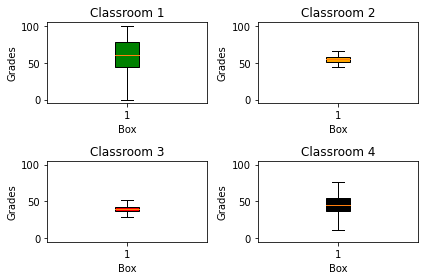

In [53]:
# set colors and titles for our histograms
colors = ['g', 'orange', 'r', 'k']
titles = ['Classroom 1', 'Classroom 2', 'Classroom 3', 'Classroom 4']

# create figure with 4 subplots, one for each boxplot/classroom
f, a = plt.subplots(2, 2)
a = a.ravel()
for idx, ax in enumerate(a):
    bp = ax.boxplot(classrooms[idx], patch_artist=True)
    bp['boxes'][0].set(facecolor = colors[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel("Box")
    ax.set_ylabel("Grades")
    ax.set_ylim(-5, 105)
plt.tight_layout()

The high variance in the Classroom 1 performance is even more clear when we check its boxplot. Minimum and maximum grades are outliers ranging from grade 0 to grade 100. Quartile 1 and 3 are also much farther from the median, in comparison with the boxplots for other classrooms.

Again we can see that almost everyone in Classroom 2 has achieved a grade above 50. For Classroom 3, it is the opposite. Almost all grades are below 50 and even the maximum grade is only narrowly above 50.



---

Finally, we can check the number of approved students for each class, to verify our descriptive analysis.

In [50]:
# iterate through every classroom and use numpy's count_nonzero function to check
# how many elements from the grade lists are equal or greater than 50
for count, cl in enumerate(classrooms):
    print("--- Classroom: %d ---" % (count + 1))
    print("Number of students that passed: %d" % np.count_nonzero(cl >= 50))  

--- Classroom: 1 ---
Number of students that passed: 68
--- Classroom: 2 ---
Number of students that passed: 90
--- Classroom: 3 ---
Number of students that passed: 2
--- Classroom: 4 ---
Number of students that passed: 41


The best performance, considering number of approved students, is from Classroom 2, where 90 of the 100 students passed. This is in accordance with our previous histogram and boxplots analyses. Even with a higher grade mean, Classroom 1 would not be considered the best one, if we concentrate on the number of laureates. That is mainly because Classroom 1 performance was much more spread and full of outliers. 

Classroom 3 indeed has a very poor performance, with only 2/100 students passing. Even though Classroom 3's grade mean is close to Classroom 4's, Classroom 3 has much less approved students.

Conclusively, we can see that the average grade results may be misleading and, therefore, should be analyzed along other measures. Even if the definition of best performance would be only the mean grade, that would not reflect reality, as Classroom 2 has much more laureates than Classroom 1.